<a href="https://colab.research.google.com/github/sancarhacer/DataSciencewithPython/blob/main/14_FeatureEngineeringEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#https://www.kaggle.com/datasets/lava18/google-play-store-apps/

In [ ]:
df = pd.read_csv("17-googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10841, 13)

In [ ]:
#kaç tane str ama numeric olabilecek data olduğunu gösterir
df["Reviews"].str.isnumeric().sum()

np.int64(10840)

In [ ]:
df[df["Reviews"].str.isnumeric()==False]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


## Preprocessing

In [ ]:
df_clean=df.copy()

In [ ]:
df_clean[[10472,"Reviews"]]="3000000"

In [ ]:
df_clean[df_clean["Reviews"].str.isnumeric()==False]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,10472


In [ ]:
df_clean["Reviews"]=df_clean["Reviews"].astype(int)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  10472           10841 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


In [ ]:
df_clean["Size"].value_counts()

,count
Size,
Varies with device,1695
11M,198
12M,196
14M,194
13M,191
...,...
552k,1
885k,1
1020k,1


In [ ]:
df_clean["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:

# 'size_to_kb' adında bir fonksiyon tanımlanıyor. Amacı, farklı birimlerde (MB, KB) veya özel metin formatındaki boyut değerlerini alıp, hepsini Kilobayt (KB) cinsinden float bir sayıya dönüştürmektir.
def size_to_kb(x):
    # Gelen değerin (x) bir metin (string) olup olmadığını kontrol eder. Sayısal olmayan temizleme ve dönüşüm adımları sadece metinler için geçerlidir.
    if isinstance(x, str):
        # Metnin başındaki ve sonundaki boşlukları temizler.
        x = x.strip()

        # Değerin "M" (Megabayt) ile bitip bitmediğini kontrol eder.
        if x.endswith("M"):  # MB → KB dönüşümü
            # Son 'M' karakterini kesip, kalan sayısal değeri float'a çevirir ve 1024 ile çarparak KB'a dönüştürür.
            return float(x[:-1]) * 1024

        # Değerin "k" (Kilobayt) ile bitip bitmediğini kontrol eder.
        elif x.endswith("k"):  # KB → değer zaten KB cinsinden olduğu için direkt alınır.
            # Son 'k' karakterini kesip, kalan sayısal değeri float olarak döndürür.
            return float(x[:-1])

        # Değerin "Varies with device" (Cihaza göre değişir) özel metni olup olmadığını kontrol eder.
        elif x == "Varies with device":
            # Bu tür belirsiz değerleri, eksik veri (NaN - Not a Number) olarak döndürür.
            return np.nan

        # Değerin "+" işaretiyle (örneğin "1,000+") bitip bitmediğini kontrol eder.
        elif x.endswith("+"):  # Belirsiz sayıları (örneğin indirme sayısı olabilir) eksik veri kabul eder.
            # Bu tür verileri de eksik veri (NaN) olarak döndürür.
            return np.nan

    # Eğer gelen değer metin değilse (örneğin zaten NaN ise) veya yukarıdaki koşulların hiçbirine uymuyorsa, eksik veri (NaN) döndürülür.
    return np.nan

# --- Fonksiyonun Uygulanması ---

# 'df_clean' adlı DataFrame'deki "Size" sütununa yukarıda tanımlanan 'size_to_kb' fonksiyonunu uygular.
# 'apply' fonksiyonu, sütundaki her bir değere bu fonksiyonu sırayla uygular.
# Son olarak, dönüşüm sonucunda elde edilen sütunu (artık KB cinsinden sayılar veya NaN'ler içeriyor) 'float' veri tipine dönüştürür ve DataFrame'deki orijinal "Size" sütunuyla değiştirir.
df_clean["Size"] = df_clean["Size"].apply(size_to_kb).astype("float")

In [ ]:
df_clean["Size"]

,Size
0,19456.0
1,14336.0
2,8908.8
3,25600.0
4,2867.2
...,...
10836,54272.0
10837,3686.4
10838,9728.0
10839,NaN


In [ ]:
df_clean.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,1696
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  10472           10841 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ MB


In [ ]:
df_clean["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [ ]:
df_clean["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [ ]:
chars_to_remove=["+",",","$"]
cols_to_clean=["Installs","Price"]
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_clean[cols]=df_clean[cols].str.replace(item,"")


In [ ]:
df_clean["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [ ]:
df_clean["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', 'Free'],
      dtype=object)

In [ ]:
df[df_clean["Installs"]== "Free"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df_clean=df_clean.drop(df_clean.index[10472])

In [ ]:
df_clean["Price"]=df_clean["Price"].astype(float)
df_clean["Installs"]=df_clean["Installs"].astype(int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  10472           10840 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.2+ MB


In [ ]:
df_clean["Last Updated"]

,Last Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"
...,...
10836,"July 25, 2017"
10837,"July 6, 2018"
10838,"January 20, 2017"
10839,"January 19, 2015"


In [ ]:
df_clean["Last Updated"] = pd.to_datetime(df_clean["Last Updated"])
df_clean["Day"]=df_clean["Last Updated"].dt.day
df_clean["Month"]=df_clean["Last Updated"].dt.month
df_clean["Year"]=df_clean["Last Updated"].dt.year
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,10472,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,3000000,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,3000000,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,3000000,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,3000000,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,3000000,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,3000000,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,3000000,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,3000000,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,3000000,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,3000000,20,6,2018


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  10472           10840 non-null  object        
 14  Day             10840 non-null  int32         
 15  Month  

In [ ]:
df_clean[df_clean.duplicated('App')].shape

(1181, 17)

In [ ]:
df_clean = df_clean.drop_duplicates(subset="App",keep = "first")

In [ ]:
df_clean.shape

(9659, 17)

## EDA

In [ ]:
numeric_features = [feature for feature in df_clean.columns if df_clean[feature].dtype != 'O']
categorical_features = [feature for feature in df_clean.columns if df_clean[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']

We have 8 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver', 10472]


/tmp/ipython-input-351698124.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df_clean[numeric_features[i]], fill=True, color='b')


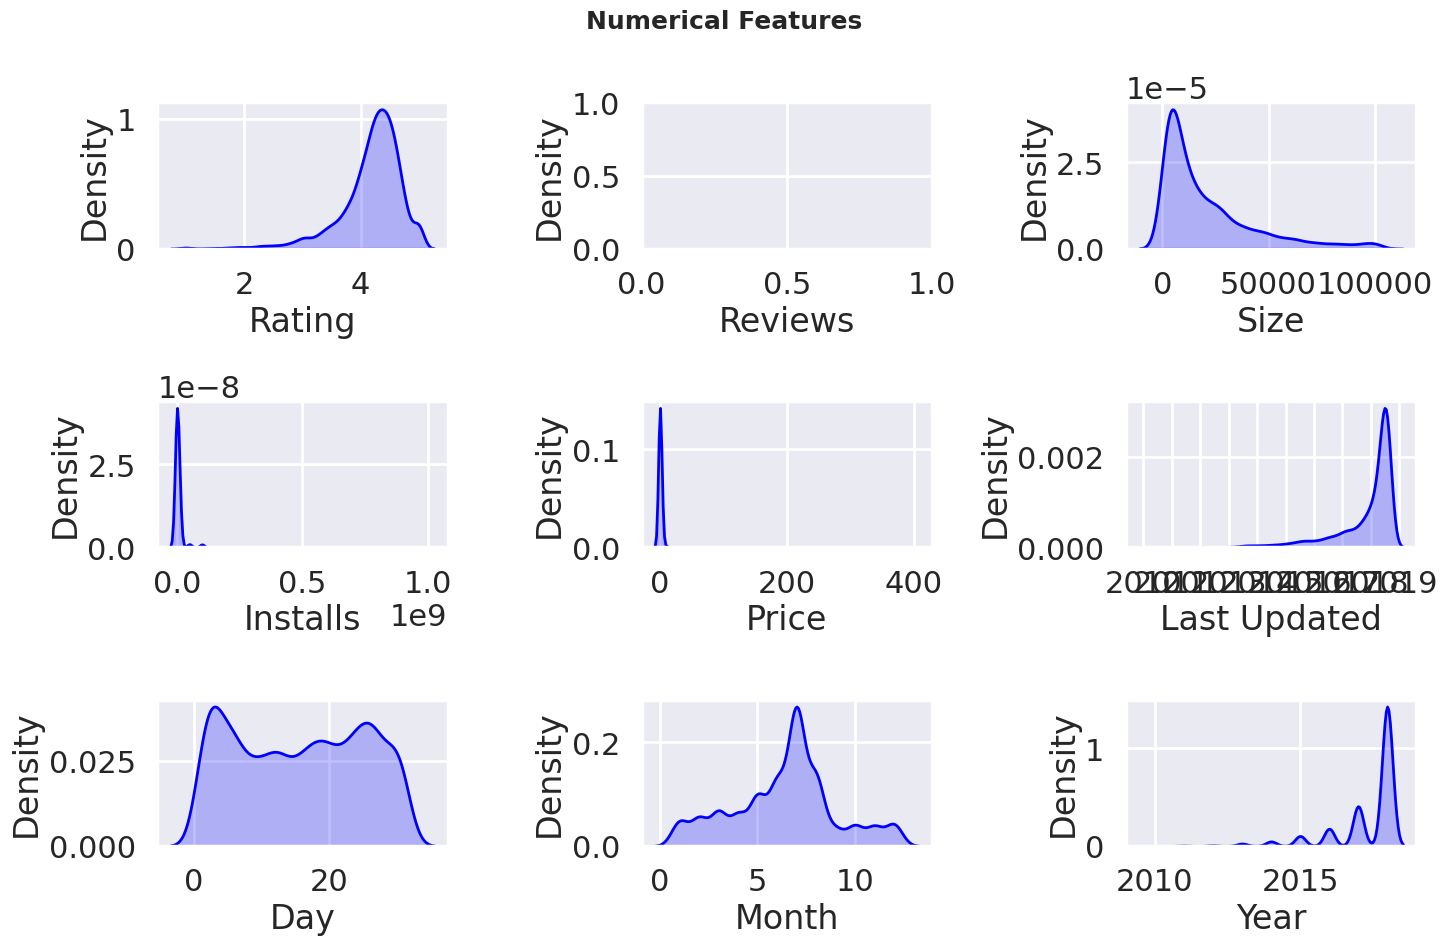

In [ ]:
# Create a new figure with a fixed size (15x15 inches)
plt.figure(figsize=(15, 15))

# Add a main title for the entire figure
plt.suptitle('Numerical Features', fontsize=18, fontweight='bold')

# Loop through all numerical features in the dataset
for i in range(0, len(numeric_features)):
    # Create a subplot in a 5x3 grid, position is (i+1)
    plt.subplot(5, 3, i+1)

    # Plot the kernel density estimation (KDE) for the current feature
    sns.kdeplot(x=df_clean[numeric_features[i]], fill=True, color='b')

    # Label the x-axis with the feature name
    plt.xlabel(numeric_features[i])

    # Adjust layout to prevent overlapping of subplots
    plt.tight_layout()

# Display all the plots
plt.show()


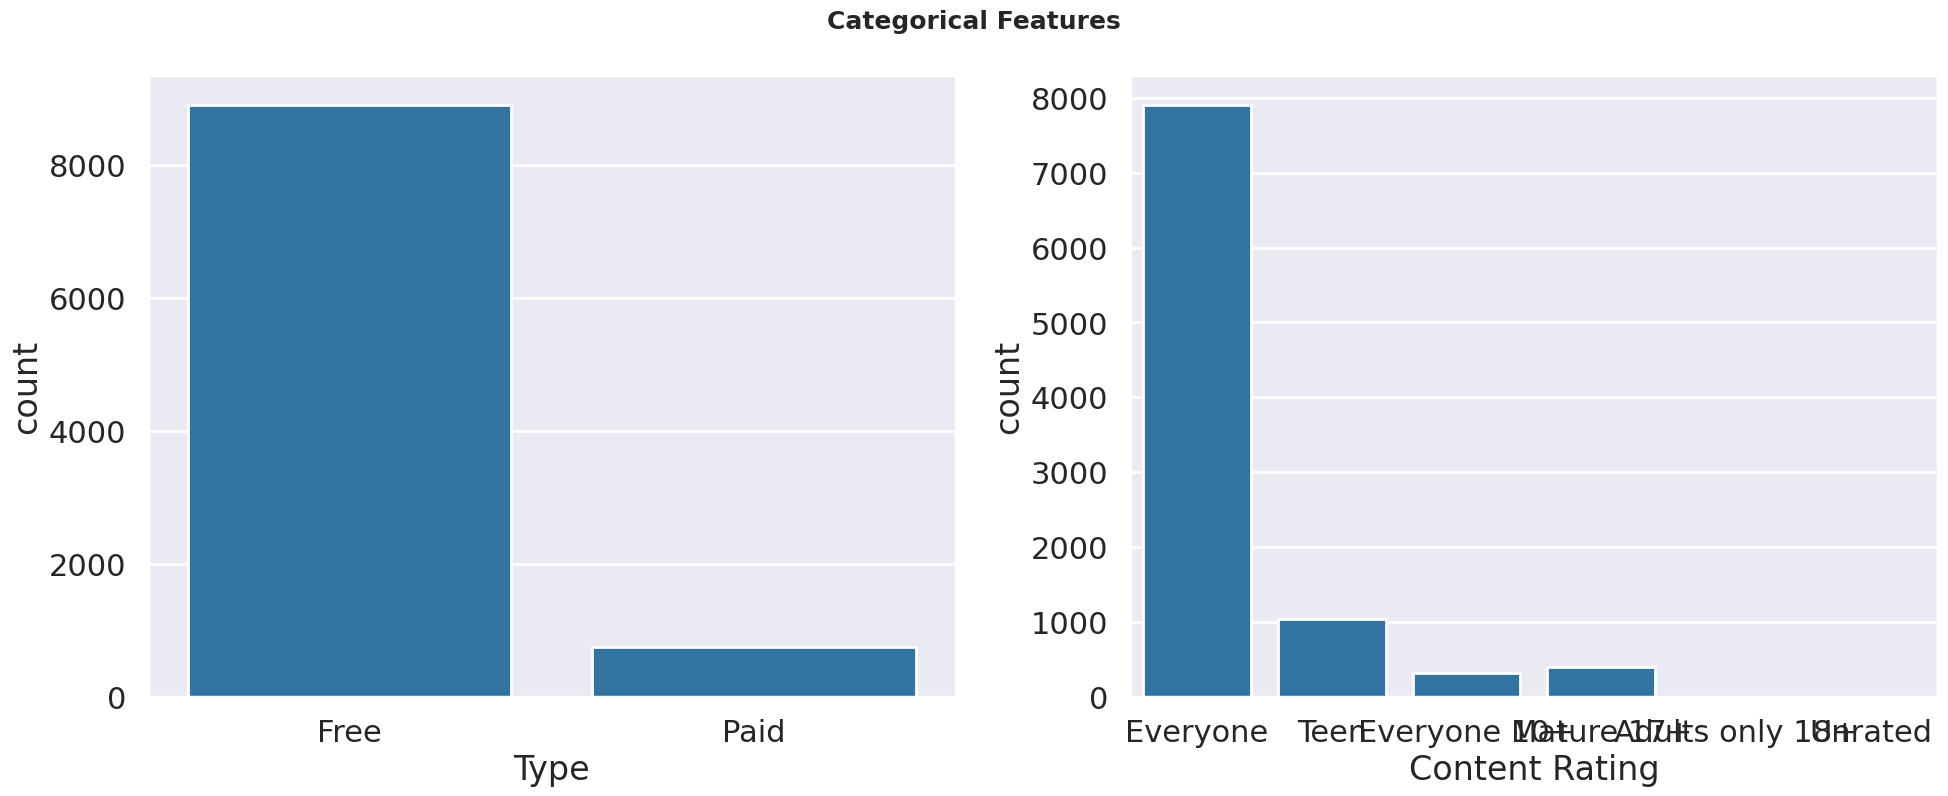

In [ ]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Categorical Features', fontsize=18, fontweight='bold')
category = ['Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_clean[category[i]])
    plt.xlabel(category[i])
    plt.tight_layout()
plt.show()

In [ ]:
## Top App Categories with count
df_clean['Category'].value_counts()

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [ ]:
# df_clean.groupby(['Category'])
# df_clean isimli DataFrame’i Category sütununa göre gruplar.
# Yani her kategori için ayrı bir grup oluşturur.

## Top app categories by installment
# Group the DataFrame by 'Category' and sum the 'Installs' for each category
# Then sort the total installs in descending order and reset the index
df_cat_installs = df_clean.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


In [ ]:
df_cat_installs.Installs = df_cat_installs.Installs/1000000000
df_cat_installs

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276
2,TOOLS,8.001772
3,PRODUCTIVITY,5.793091
4,SOCIAL,5.487868
5,PHOTOGRAPHY,4.649148
6,FAMILY,4.427942
7,VIDEO_PLAYERS,3.926903
8,TRAVEL_AND_LOCAL,2.894887
9,NEWS_AND_MAGAZINES,2.369218


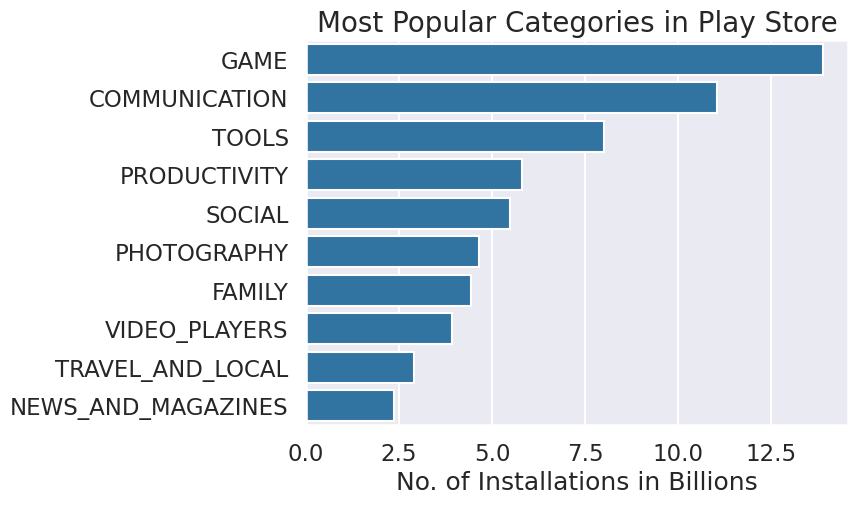

In [ ]:
df2 = df_cat_installs.head(10)

# Yeni bir figür (görselleştirme alanı) oluşturulur.
# Boyutu (figsize) 7 inç genişlik ve 5 inç yükseklik olarak ayarlanır.
plt.figure(figsize = (7,5))

# Seaborn kütüphanesinin stil ayarları yapılır:
# 'talk' bağlamı seçilerek yazı tipi, çizgi kalınlığı gibi elementlerin sunum (slayt) boyutlarına uygun hale gelmesi sağlanır.
sns.set_context("talk")
# Arka plan stili 'darkgrid' (koyu ızgara) olarak ayarlanır, bu da okumayı kolaylaştırır.
sns.set_style("darkgrid")

# --- Çubuk Grafik (Bar Plot) Oluşturma ---
# Seaborn'ın barplot fonksiyonu kullanılarak yatay bir çubuk grafik oluşturulur.
# Veri kaynağı: Sadece ilk 10 kategoriyi içeren 'df2' DataFrame'i kullanılır.
ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )

ax.set_xlabel('No. of Installations in Billions')

ax.set_ylabel('')

# Başlık boyutu (size) 20 olarak belirlenir.
ax.set_title("Most Popular Categories in Play Store", size = 20)

plt.show()

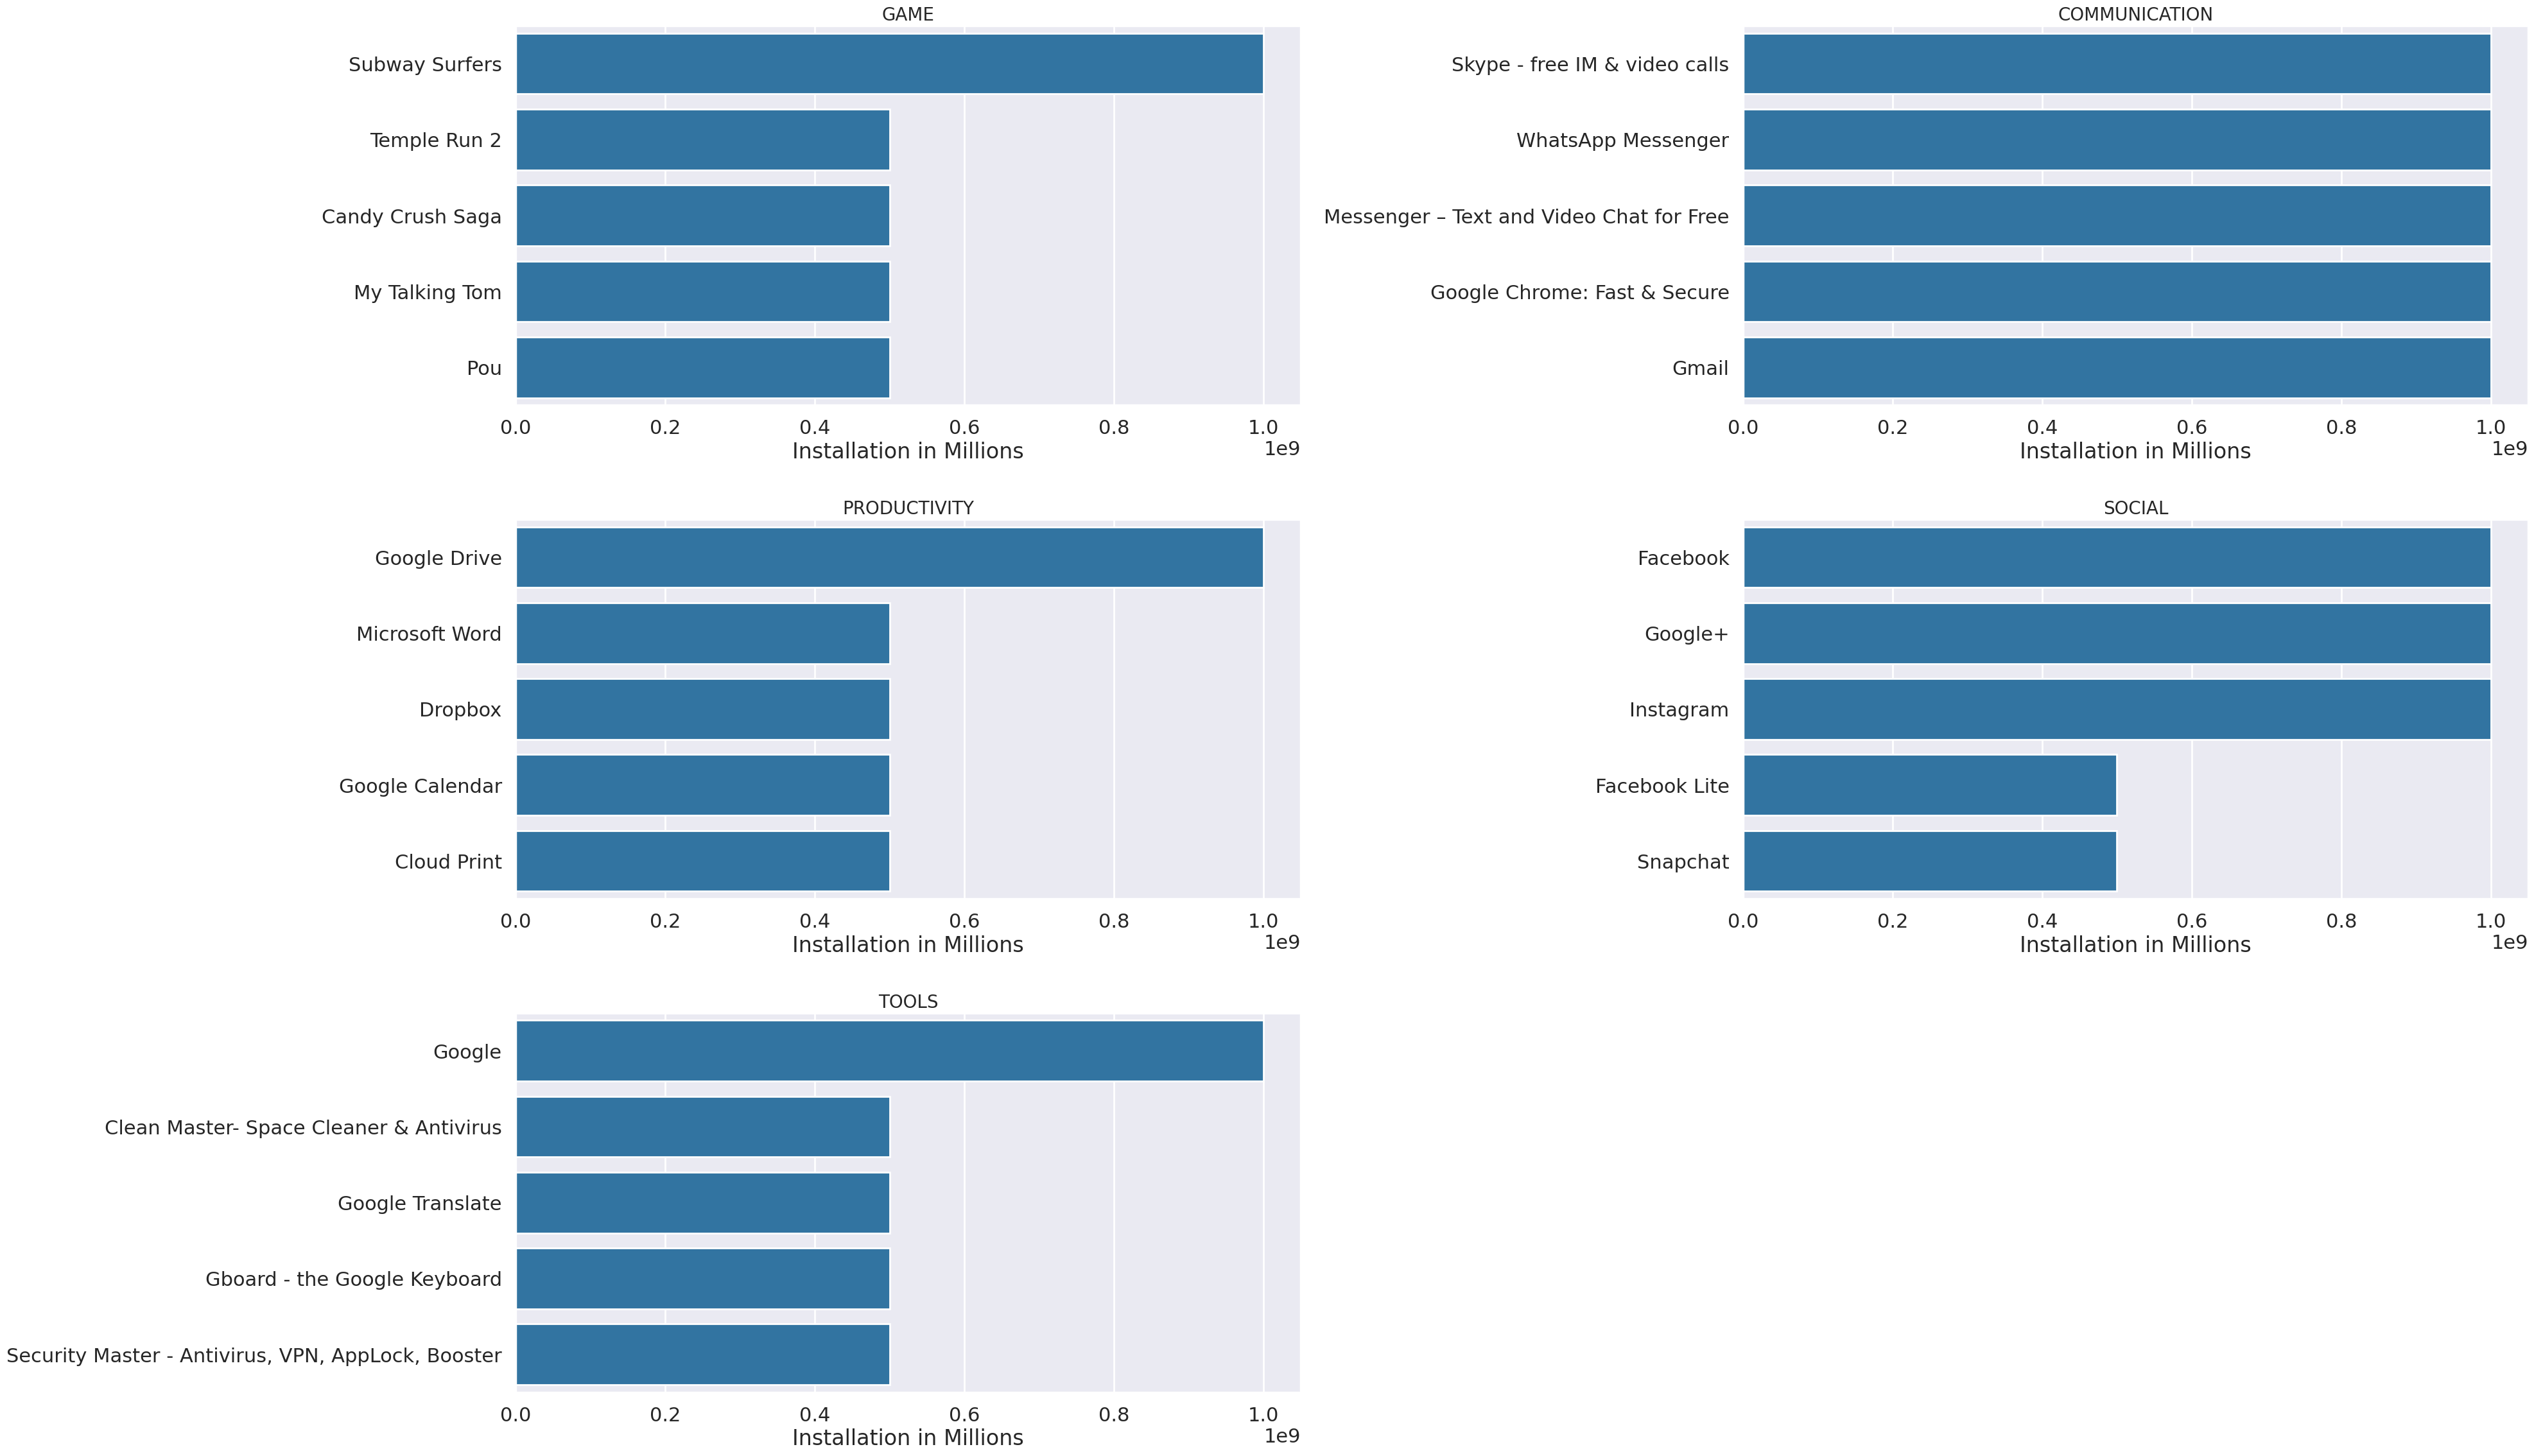

In [ ]:
# Group the DataFrame by both 'Category' and 'App', sum their 'Installs', and reset the index
df_app_category = df_clean.groupby(['Category' ,'App'])['Installs'].sum().reset_index()

# Sort all apps by total installs in descending order
df_app_category = df_app_category.sort_values('Installs', ascending = False)

# Define the list of popular categories to visualize
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ,'TOOLS']

# Set Seaborn context and style for plotting
# Bu ayar, grafikteki tüm öğelerin (yazı tipi boyutu, çizgi kalınlığı, eksen işaretleri vb.)
# büyük bir posterde veya slaytta iyi görünmesi için büyük ölçekli olmasını sağlar.
sns.set_context("poster")
sns.set_style("darkgrid")

# Create a large figure to accommodate multiple subplots
plt.figure(figsize=(40,30))

# Loop over each popular category
for i, app in enumerate(apps):
    # Filter DataFrame for the current category
    df2 = df_app_category[df_app_category.Category == app]

    # Take only the top 5 most installed apps in this category
    df_top_5 = df2.head(5)

    # Create a subplot for each category
    plt.subplot(4,2,i+1)

    # Plot a horizontal bar plot of top 5 apps vs their installs
    sns.barplot(data=df_top_5, x='Installs', y='App')

    # Label axes and set title
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app, size=20)

# Adjust layout and spacing between subplots
plt.tight_layout()
plt.subplots_adjust(hspace=.3)

# Show the final plot
plt.show()


In [ ]:
# how many 5 rated apps?

# 'df_clean' DataFrame'ini sırasıyla 'Category', 'Installs' ve 'App' sütunlarına göre gruplar.
# Bu üç sütunun her birleşimi için tek bir grup oluşturulur.
# Gruplanan veriler içinden sadece 'Rating' (Derecelendirme) sütunu seçilir.
# Bu grupların her biri için 'Rating' değerlerinin 'toplamını' (sum) hesaplar.
rating_df = df_clean.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()
top_rated_apps = rating_df[rating_df["Rating"] == 5.0]
top_rated_apps

,Category,Installs,App,Rating
0,FAMILY,10,DN Employee,5.0
1,FAMILY,10,Chronolink DX,5.0
2,MEDICAL,500,FHR 5-Tier 2.0,5.0
3,HEALTH_AND_FITNESS,10,CB Fit,5.0
4,MEDICAL,100,Zen Leaf,5.0
...,...,...,...,...
266,FAMILY,10,Story Time FD,5.0
267,FAMILY,50,DYPSOET,5.0
268,LIBRARIES_AND_DEMO,1000,Nur təfsiri 1-ci cild,5.0
269,LIBRARIES_AND_DEMO,1000,Eternal life,5.0


In [ ]:
top_rated_apps.shape

(271, 4)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  10472           9659 non-null   object        
 14  Day             9659 non-null   int32         
 15  Month   

In [ ]:
df_clean["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [ ]:
# 'regex=True' parametresi, 'replace' fonksiyonunun ilk argümanını bir normal ifade (düzenli ifade) olarak ele almasını sağlar.
# Bulunan "and up" ifadesi, ikinci argümanda belirtilen boş bir dize ("") ile değiştirilir, yani bu ifade kaldırılır/silinir.
df_clean["Android Ver"] = df_clean["Android Ver"].replace("and up","", regex=True)

In [ ]:
df_clean["Android Ver"] = df_clean["Android Ver"].replace( "W","", regex=True)
df_clean["Android Ver"] = df_clean["Android Ver"].replace("Varies with device",np.nan, regex=True).replace("",np.nan, regex=True)
df_clean["Android Ver"] = df_clean["Android Ver"].replace("nan",np.nan, regex=True)

In [ ]:
df_clean["Android Ver"].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       nan, '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ',
       '5.1 ', '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ', '7.1 ',
       '7.0 - 7.1.1', '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [ ]:
df_clean["Android Ver"].str.contains("-").sum()

9

In [ ]:
df_clean=df_clean.loc[df_clean['Android Ver'].str.contains('-') == False]

In [ ]:
df_clean["Android Ver"].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ', '5.1 ',
       '4.3 ', '2.0 ', '3.2 ', '7.1 ', '8.0 ', '3.1 ', '2.0.1 ', '1.0 '],
      dtype=object)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8658 entries, 0 to 10838
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8658 non-null   object        
 1   Category        8658 non-null   object        
 2   Rating          7240 non-null   float64       
 3   Reviews         8658 non-null   int64         
 4   Size            8375 non-null   float64       
 5   Installs        8658 non-null   int64         
 6   Type            8658 non-null   object        
 7   Price           8658 non-null   float64       
 8   Content Rating  8658 non-null   object        
 9   Genres          8658 non-null   object        
 10  Last Updated    8658 non-null   datetime64[ns]
 11  Current Ver     8650 non-null   object        
 12  Android Ver     8658 non-null   object        
 13  10472           8658 non-null   object        
 14  Day             8658 non-null   int32         
 15  Month   

In [ ]:
# if you want encoding, you can go for target mean encoding
# example: genres
# calculate the mean installs for each "Genres"
mean_genres_installs=df_clean.groupby("Genres")["Installs"].mean()/1_000_000
mean_genres_installs

,Installs
Genres,
Action,11.255844
Action;Action & Adventure,3.910955
Adventure,4.064319
Adventure;Action & Adventure,21.230000
Adventure;Brain Games,0.100000
...,...
Video Players & Editors,7.093219
Video Players & Editors;Creativity,5.000000
Video Players & Editors;Music & Video,5.000000


In [ ]:
mean_genres_installs = mean_genres_installs.to_dict()

In [ ]:
# map(), "Genres" sütunundaki metinsel kategorileri (örneğin "Oyun"), bu kategorilerin ortalama yükleme sayılarını temsil eden sayısal
# değerlere dönüştürerek Hedef Kodlama (Target Encoding) işlemini gerçekleştirir.
df_clean["Genres Encoded"]=df_clean["Genres"].map(mean_genres_installs)

In [ ]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,10472,Day,Month,Year,Genres Encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,3000000,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,3000000,7,1,2018,1.830859
1,Coloring book moana,ART_AND_DESIGN,3.9,3000000,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,3000000,15,1,2018,0.500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,3000000,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,3000000,1,8,2018,1.830859
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,3000000,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,3000000,8,6,2018,1.830859
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,3000000,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,3000000,20,6,2018,0.285000
